In [107]:
#importing required libraries

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

%matplotlib inline

## I. Reading Data

In [2]:
#importing dataset

leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking column names

leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## II. Analyzing dataset

In [4]:
#checking number of rows and columns

leads_data.shape
print('The leads dataset has {} rows'.format(leads_data.shape[0]))
print('The leads dataset has {} columns'.format(leads_data.shape[1]))

The leads dataset has 9240 rows
The leads dataset has 37 columns


In [5]:
#checking column entries & datatypes

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### We can see the presence of null/missing values in some columns

In [6]:
#check on numerical columns

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Oulier presence is evident from the data above. 75% and maximum values have significant unlinear increase.

In [7]:
#checking the categories in each column

for i in leads_data.columns:
    print(leads_data[i].value_counts())
    print('\n---------------------------------------------------------------------\n')

f8802d64-85e8-4656-a057-7d1ca6493f44    1
733e2eab-de08-488e-869a-9b6f261eaa70    1
3a4edfa5-d54e-4571-a589-411e5c2ba365    1
47feb397-4e64-4973-b184-e3c0ba36be81    1
8670f617-9437-454a-9465-61e65602bf1d    1
                                       ..
38b190ed-233f-4158-9844-3bc687667acb    1
d6f0f0f0-995b-43a7-ab6c-4e4d8c9665c8    1
27d1ebd2-606c-4e03-9424-70fa440b4478    1
facbd0ac-58fe-407b-9778-60ae8b5ff12a    1
baff50a7-725d-46e7-b930-626ddda9bbbe    1
Name: Prospect ID, Length: 9240, dtype: int64

---------------------------------------------------------------------

608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64

---------------------------------------------------------------------

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead

Name: I agree to pay the amount through cheque, dtype: int64

---------------------------------------------------------------------

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

---------------------------------------------------------------------

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

---------------------------------------------------------------------



## III. Data Cleaning

#### Certain columns have an entry 'Select' which is nothing but caused due to customers not filling in the details.

In [8]:
#missing values in columns before adding 'Select' values
leads_data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [9]:
#we will replace all Select values with NaN

leads_data = leads_data.replace(to_replace='Select', value=np.nan)

In [10]:
#checking null/missing values in columns after adding 'Select' values

leads_data.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

#### As we can see, many columns posess null values in huge number. Lets visualize it in a more effective way.

In [11]:
#checking null/missing values % in columns

round(((leads_data.isnull().sum()/len(leads_data))*100).sort_values(ascending=False),2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

#### We can straight way remove all those columns having more than 30% null values as it is not helpful even if we impute.

#### We will keep column 'Specialization' out and treat it alone.

In [12]:
#getting a df of columns to be dropped 

null_columns = leads_data[['How did you hear about X Education','Lead Quality','Lead Profile',
                           'Asymmetrique Activity Index','Asymmetrique Profile Index',
                           'Asymmetrique Activity Score','Asymmetrique Profile Score','City','Tags']]

null_columns.head()

,How did you hear about X Education,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,City,Tags
0,NaN,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,NaN,Interested in other courses
1,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,NaN,Ringing
2,NaN,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Mumbai,Will revert after reading the email
3,Word Of Mouth,Not Sure,NaN,02.Medium,01.High,13.0,17.0,Mumbai,Ringing
4,Other,Might be,NaN,02.Medium,01.High,15.0,18.0,Mumbai,Will revert after reading the email


#### Knowing the city of a customer is of no importance as we are dealing with a completely online education system.

In [13]:
#dropping all the above columns having null values more than 40%

leads = leads_data.drop(['How did you hear about X Education','Lead Quality','Lead Profile',
                         'Asymmetrique Activity Index','Asymmetrique Profile Index',
                           'Asymmetrique Activity Score','Asymmetrique Profile Score','City','Tags'],axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [14]:
leads.shape

(9240, 28)

<AxesSubplot:>

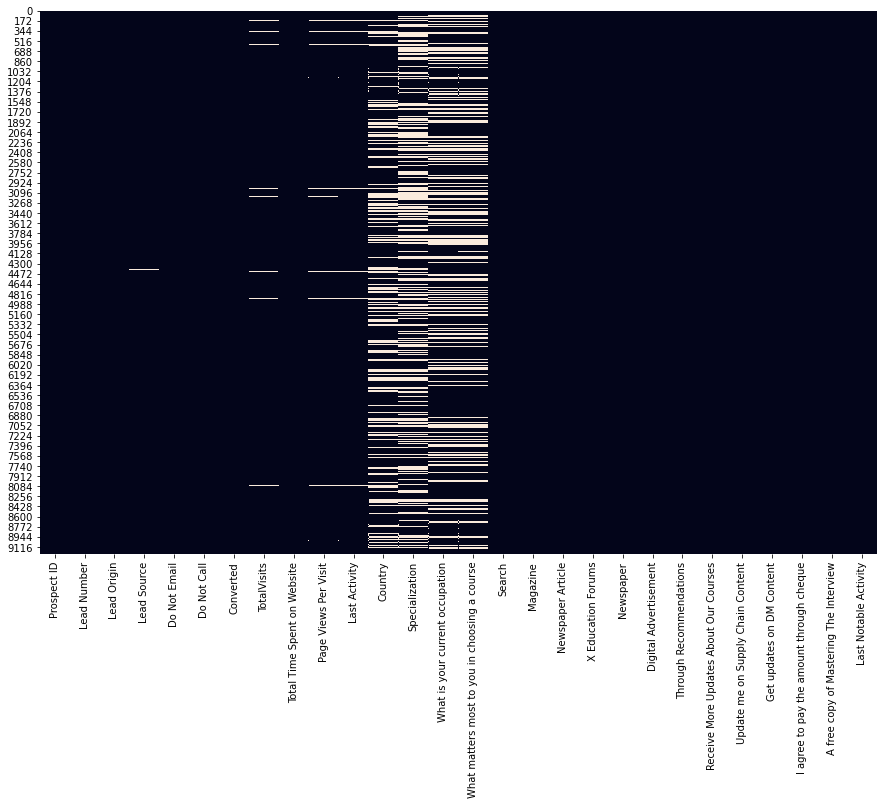

In [15]:
#visualizing null values in different columns

plt.figure(figsize=[15,10])
sns.heatmap(leads.isnull(), cbar=False)

### Handling other columns with null values

#### We will now analyze the levels in each column and handle them according to their importance & handle other columns with nulls.

In [16]:
#checking column 'What matters most to you in choosing a course' with 29.32% null values

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### We can see that almost 100% of records are having a single category as input and hence we can drop this column.

In [17]:
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [18]:
#checking column 'What is your current occupation' with 29.11% null values

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
leads['What is your current occupation'].isnull().sum()

2690

- **We have here 2690 missing values and it is not good to impute such huge missing numbers with mode or any other methods.**
- **We will drop all 2690 rows from the dataset and keep the column for further analysis.**

In [20]:
#removing all 2690 rows
leads = leads[~leads['What is your current occupation'].isnull()]

#### Column 'Country' is again something which is not a valuable variable helping in prediction. Hence, can be dropped.

In [21]:
leads.drop('Country', axis=1, inplace=True)

### Columns with very low missing values

- **TotalVisits (137 missing)**
- **Page Views Per Visit (137 missing)**
- **Last Activity (103 missing)**
- **Lead Source (36 missing)**

**These columns have under 2% of missing values and hence we will remove the respective rows from the dataset.**

In [22]:
leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Page Views Per Visit'].isnull()]
leads = leads[~leads['Last Activity'].isnull()]
leads = leads[~leads['Lead Source'].isnull()]

In [23]:
#checking again count of null values

round((leads.isnull().sum()/len(leads))*100,2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                              29.04
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


- **We have successfully removed the null/missing values from all the columns.**
- **Specialization column will be cleansed during Dummy variables creation as removing 30% records will not be a good choice**

#### After looking through the datatypes of each column, it appears that all of them are properly assigned. 

## Outlier Detection

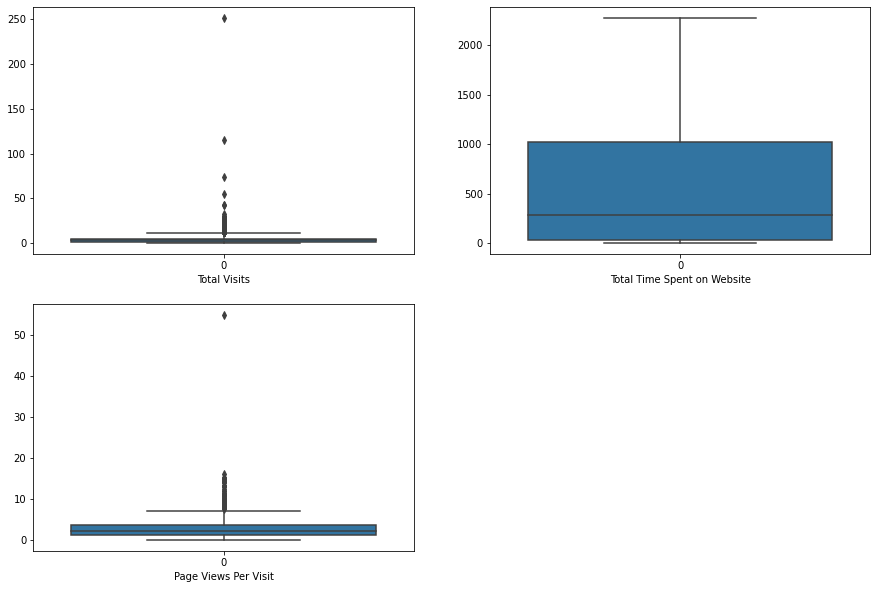

In [24]:
# let us now check the outliers on numerical columns , if any present

plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.boxplot(data=leads.TotalVisits)
plt.xlabel('Total Visits')

plt.subplot(2,2,2)
sns.boxplot(data=leads['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')

plt.subplot(2,2,3)
sns.boxplot(data=leads['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')

plt.show()

#### Total Visits & Page Views have outliers in them and we will try to remove those.

In [25]:
#representing TotalVisits in percentile

leads['TotalVisits'].describe(percentiles=[0.,0.2,.4,.5,.75,.90,.95,.99])

count    6391.000000
mean        3.620091
std         5.042908
min         0.000000
0%          0.000000
20%         0.000000
40%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [26]:
#representing Page Views Per Visit in percentile

leads['Page Views Per Visit'].describe(percentiles=[0.,0.2,.4,.5,.75,.90,.95,.99])

count    6391.000000
mean        2.477859
std         2.165296
min         0.000000
0%          0.000000
20%         0.000000
40%         2.000000
50%         2.000000
75%         3.500000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Clearly there is a huge increase from 99% and last value.

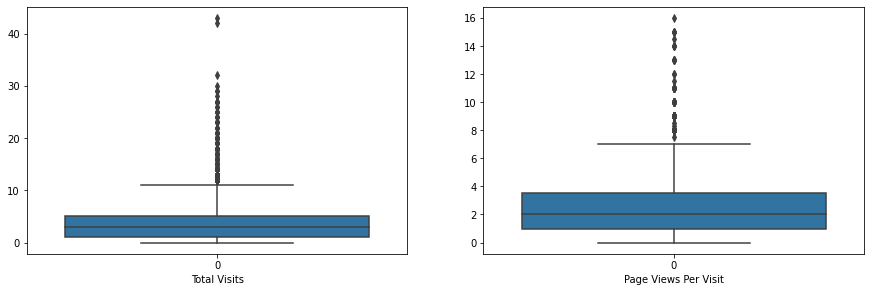

In [27]:
#we will compress the values to range 1% - 99% 

percentile_1 = leads['TotalVisits'].quantile(0.01)
percentile_99 = leads['TotalVisits'].quantile(0.99)
IQR = percentile_99 - percentile_1 
leads = leads[(leads['TotalVisits'] >= percentile_1 - IQR*1.5) & (leads['TotalVisits'] <= percentile_99 + IQR*1.5)]

percentile_1 = leads['Page Views Per Visit'].quantile(0.01)
percentile_99 = leads['Page Views Per Visit'].quantile(0.99)
IQR = percentile_99 - percentile_1
leads = leads[(leads['Page Views Per Visit'] >= percentile_1 - IQR*1.5) & (leads['Page Views Per Visit'] <= percentile_99 + IQR*1.5)]

#we will check the outliers again
plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.boxplot(data=leads.TotalVisits)
plt.xlabel('Total Visits')

plt.subplot(2,2,2)
sns.boxplot(data=leads['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')

plt.show()

#### Outliers have been compromised.

## IV. Univariate & Multivariate Analysis

In [28]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6387 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               6387 non-null   object 
 1   Lead Number                               6387 non-null   int64  
 2   Lead Origin                               6387 non-null   object 
 3   Lead Source                               6387 non-null   object 
 4   Do Not Email                              6387 non-null   object 
 5   Do Not Call                               6387 non-null   object 
 6   Converted                                 6387 non-null   int64  
 7   TotalVisits                               6387 non-null   float64
 8   Total Time Spent on Website               6387 non-null   int64  
 9   Page Views Per Visit                      6387 non-null   float64
 10  Last Activity                       

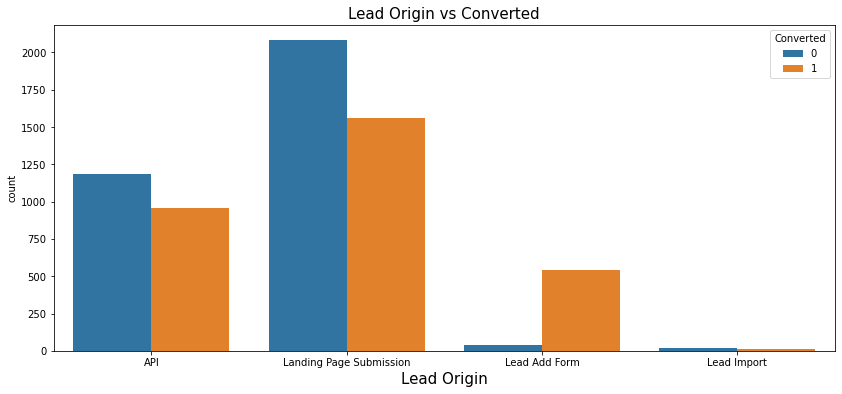

In [29]:
#visualizing Lead Origin variable. 

plt.figure(figsize=[14,6])
sns.countplot(x=leads['Lead Origin'],hue=leads.Converted)
plt.xlabel('Lead Origin', fontsize = 15)
plt.title('Lead Origin vs Converted',fontsize = 15)
plt.show()

- **We can see that APIs & Landing page submissions are the major identifiers of customers as leads**
- **However, more than half of the people are false leads.**

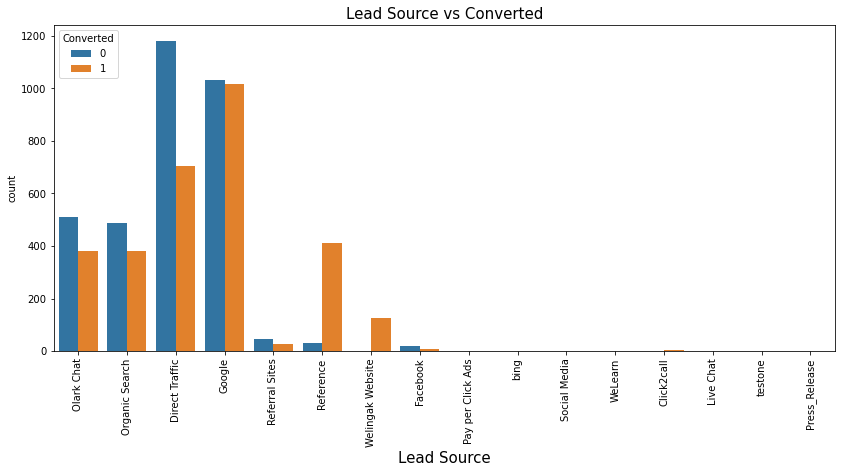

In [30]:
#visualizing Lead Source variable. 

plt.figure(figsize=[14,6])
sns.countplot(x=leads['Lead Source'],hue=leads.Converted)
plt.xlabel('Lead Source', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Lead Source vs Converted',fontsize = 15)
plt.show()

- **Google Search looks like the major contributor to the leads.**
- **Customers coming out of referrals seem to have converted completely.**

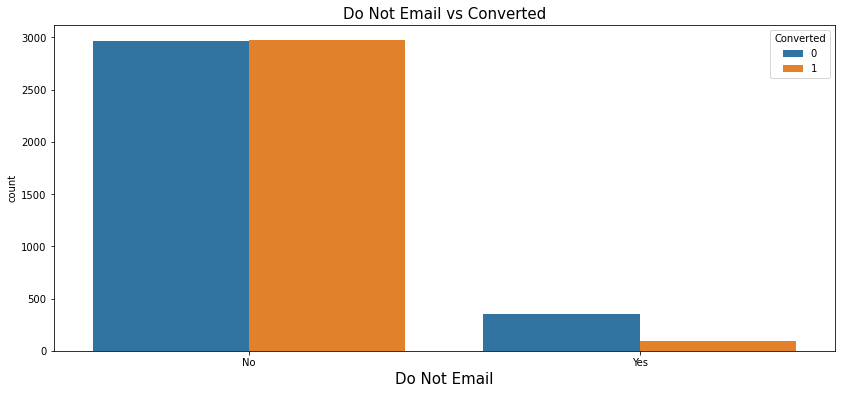

In [31]:
#visualizing Do Not Email variable. 

plt.figure(figsize=[14,6])
sns.countplot(x=leads['Do Not Email'],hue=leads.Converted)
plt.xlabel('Do Not Email', fontsize = 15)
plt.title('Do Not Email vs Converted',fontsize = 15)
plt.show()

- **Receiving/Not Receiving mails do not contribute much to lead convertion.**
- **Moreover, the 'Yes' value count is very low compared to 'No' count and could cause imbalance.**

#### Since, the imbalance is very high, we could remove the column. Let us create a list to append all the columns of this type.

In [32]:
#creating a column to add  all the columns with imbalance ratio and to finally drop them.

columns_to_be_dropped = []
columns_to_be_dropped.append('Do Not Email')

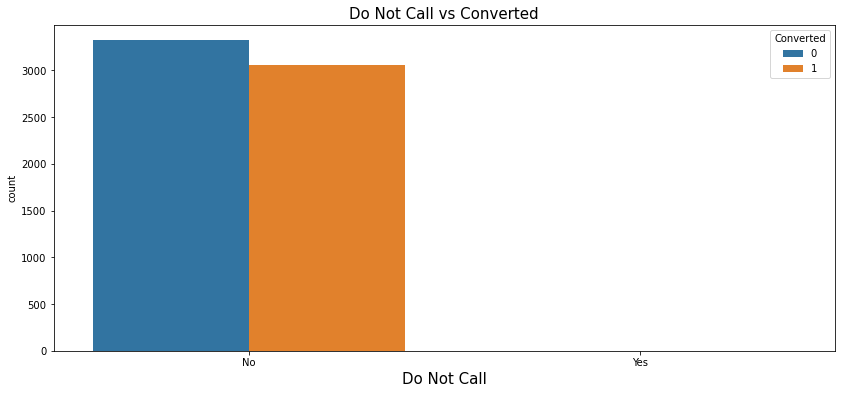

In [33]:
#visualizing Do Not Call variable. 

plt.figure(figsize=[14,6])
sns.countplot(x=leads['Do Not Call'],hue=leads.Converted)
plt.xlabel('Do Not Call', fontsize = 15)
plt.title('Do Not Call vs Converted',fontsize = 15)
plt.show()

- **The variable has almost no 'Yes' Responses and can be removed from analysis.**

In [34]:
columns_to_be_dropped.append('Do Not Call')
columns_to_be_dropped

['Do Not Email', 'Do Not Call']

#### There are many columns just like we observed above for 'Do not Call' where either one category is almost 100% occupied or there won't even be a second category. 
#### These are not going to explain any variance to the model and hence we can drop all of them. Some of them are : 

- **I agree to pay the amount through cheque**
- **Get updates on DM Content**
- **Update me on Supply Chain Content**
- **Receive More Updates About Our Courses**
- **Through Recommendations**
- **Digital Advertisement**
- **Newspaper**
- **X Education Forums**
- **Newspaper Article**
- **Magazine**
- **Search**

#### Along with this, we will also remove the columns holding Customer ID and number - Prospect ID & Lead Number.

In [35]:
#adding the above columns to the list : 
#Also, adding the columns Prospect ID, Lead Number, Do Not Email & Do Not Call
columns_to_be_dropped = ['I agree to pay the amount through cheque','Get updates on DM Content',
                             'Update me on Supply Chain Content','Receive More Updates About Our Courses',
                             'Through Recommendations','Digital Advertisement','Newspaper','X Education Forums',
                             'Newspaper Article','Magazine','Search', 'Do Not Email','Do Not Call','Prospect ID','Lead Number']
columns_to_be_dropped

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Through Recommendations',
 'Digital Advertisement',
 'Newspaper',
 'X Education Forums',
 'Newspaper Article',
 'Magazine',
 'Search',
 'Do Not Email',
 'Do Not Call',
 'Prospect ID',
 'Lead Number']

In [36]:
#dropping all columns 
leads.drop(columns_to_be_dropped, axis=1, inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6387 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6387 non-null   object 
 1   Lead Source                             6387 non-null   object 
 2   Converted                               6387 non-null   int64  
 3   TotalVisits                             6387 non-null   float64
 4   Total Time Spent on Website             6387 non-null   int64  
 5   Page Views Per Visit                    6387 non-null   float64
 6   Last Activity                           6387 non-null   object 
 7   Specialization                          4532 non-null   object 
 8   What is your current occupation         6387 non-null   object 
 9   A free copy of Mastering The Interview  6387 non-null   object 
 10  Last Notable Activity                   6387 non-null   obje

## V. Dummy Variables Creation

In [37]:
#checking categorical variables
leads.select_dtypes(include=['object'])

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,NaN,Unemployed,No,Modified
1,API,Organic Search,Email Opened,NaN,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,Converted to Lead,NaN,Unemployed,No,Modified
...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,No,Modified
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Unemployed,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Yes,SMS Sent


In [38]:
#creating dummies for all categorical variable except for Specialization
dummies = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                               'A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
#we will now concat this to original dataframe and drop the original columns

new_leads = pd.concat([leads,dummies],axis=1)
new_leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                               'A free copy of Mastering The Interview','Last Notable Activity'],axis=1,inplace=True)
new_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Column - Specialization

- **Since this column contains missing values(which is a sum of NaN & Select values), we cannot create dummies and feed to model.**
- **While creating dummies, we will explicitily drop the Nan values by mentioning the column.**
- **For that, we will first convert back the NaN values to a string 'Select', so that it can be easily identified and dropped.**

In [40]:
#Converting Nan values to Select 
new_leads.Specialization.replace(np.nan, 'Select',inplace=True)

In [41]:
specialization_dummies = pd.get_dummies(new_leads['Specialization'], drop_first=False)
specialization_dummies.drop('Select',axis=1,inplace=True)
specialization_dummies.head()

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#we will now concat this to original dataframe and drop the original column

new_leads = pd.concat([new_leads,specialization_dummies],axis=1)
new_leads.drop(['Specialization'],axis=1,inplace=True)
new_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#checking shape
new_leads.shape

(6387, 74)

## VI. Model Building

In [44]:
#creating X and y for model training

y = new_leads.Converted
y

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9235    1
9236    0
9237    0
9239    1
Name: Converted, Length: 6387, dtype: int64

In [45]:
X = new_leads.drop('Converted',axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
X.shape

(6387, 73)

In [47]:
#splitting into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
8852,7.0,5,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7378,2.0,362,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8745,3.0,2253,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6834,2.0,157,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1556,6.0,5,3.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling Numerical columns using MinMaxScaler

In [48]:
#scaling down all values to range between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
8852,0.166667,0.002201,0.466667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7378,0.047619,0.159331,0.133333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8745,0.071429,0.991637,0.200000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6834,0.047619,0.069102,0.133333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1556,0.142857,0.002201,0.200000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking Correlations

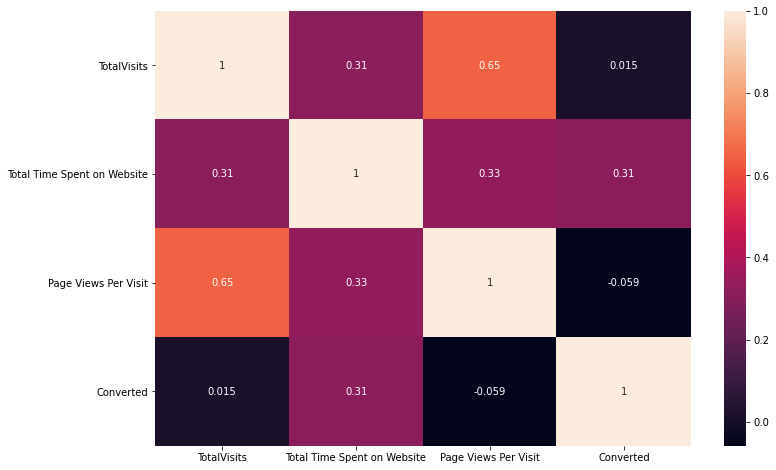

In [49]:
corr_df = pd.concat([X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']],y_train],axis=1)

plt.figure(figsize=[12,8])
sns.heatmap(corr_df.corr(),annot=True)  #using heatmap for checking correlations
plt.show()

- **TotaVisits & Page Views seems to be correlated with each other.**

### Model 1

In [50]:
#adding constant
X_train_sm1 = sm.add_constant(X_train)

logreg1 = sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial()) #fitting a model using GLM

logmodel1 = logreg1.fit()

logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4470
Model:                            GLM   Df Residuals:                     4401
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Sep 2021   Deviance:                          nan
Time:                        12:29:01   Pearson chi2:                 5.12e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.093e+15   9.93e+07    1.1e+07      0.000    1.09e+15    1.09e+15
TotalVisits                                           1.219e+15   1.71e+07   7.14e+07      0.000    1.22e+15    1.22e+15
Total Time Spent on Website                           3.128e+15   4.66e+06   6.71e+08      0.000    3.13e+15    3.13e+15
Page Views Per Visit                                 -6.523e+14   1.17e+07  -5.58e+07      0.000   -6.52e+14   -6.52e+14
Lead Origin_Landing Page Submission                   2.557e+14   3.77e+06   6.78e+07      0.000    2.56e+14    2.56e+14
Lead Origin_Lead Add Form                             6.497e+14   4.77e+07   1.36e+07      0.000     6.5e+14     6.5e+14
Lead Origin_Lead Import                              -1.041e+15   3.47e+07     -3e+07      0.000   -1.04e+15   -1.04e+15
Lead Source_Direct Traffic                            -3.37e+15   6.74e+07     -5e+07      0.000   -3.37e+15   -3.37e+15
Lead Source_Facebook                                 -1.041e+15   3.47e+07     -3e+07      0.000   -1.04e+15   -1.04e+15
Lead Source_Google                                   -3.118e+15   6.74e+07  -4.63e+07      0.000   -3.12e+15   -3.12e+15
Lead Source_Live Chat                                 1.684e+15   8.24e+07   2.04e+07      0.000    1.68e+15    1.68e+15
Lead Source_Olark Chat                               -3.092e+15   6.75e+07  -4.58e+07      0.000   -3.09e+15   -3.09e+15
Lead Source_Organic Search                           -3.062e+15   6.74e+07  -4.54e+07      0.000   -3.06e+15   -3.06e+15
Lead Source_Pay per Click Ads                          143.6221   1.73e-06    8.3e+07      0.000     143.622     143.622
Lead Source_Press_Release                            -6.616e+15   9.55e+07  -6.93e+07      0.000   -6.62e+15   -6.62e+15
Lead Source_Reference                                -2.449e+15   4.79e+07  -5.11e+07      0.000   -2.45e+15   -2.45e+15
Lead Source_Referral Sites                           -3.287e+15    6.8e+07  -4.83e+07      0.000   -3.29e+15   -3.29e+15
Lead Source_Social Media                             -2.992e+15   8.27e+07  -3.62e+07      0.000   -2.99e+15   -2.99e+15
Lead Source_WeLearn                                   8.846e+13   9.53e+07   9.29e+05      0.000    8.85e+13    8.85e+13
Lead Source_Welingak Website                          -1.84e+15   4.83e+07  -3.81e+07      0.000   -1.84e+15   -1.84e+15
Lead Source_bing                                     -4.111e+15   7.78e+07  -5.28e+07      0.000   -4.11e+15   -4.11e+15
Lead Source_testone                                  -7.311e+15   9.51e+07  -7.69e+07      0.000   -7.31e+15   -7.31e+15
Last Activity_Converted to Lead                      -4.16

In [53]:
#using RFE for feature selection

log =LogisticRegression()

rfe = RFE(log, 15)
rfe = rfe.fit(X_train,y_train)

#list of columns selected using RFE according to their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 59),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 48),
 ('Lead Source_testone', False, 41),
 ('Last Activity_Converted to Lead', False, 33),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Activi

In [54]:
#selecting the 15 columns
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,82.84
5,Lead Source_Reference,64.32
6,Lead Source_Welingak Website,19.67
11,What is your current occupation_Unemployed,6.09
2,Page Views Per Visit,5.33
0,TotalVisits,3.61
1,Total Time Spent on Website,2.42
8,Last Activity_Had a Phone Conversation,2.26
13,Last Notable Activity_Had a Phone Conversation,2.25
12,What is your current occupation_Working Profes...,1.86


#### The VIF value of column 'Lead Origin_Lead Add Form' is too high and we will drop it.

In [59]:
#dropping attribute
cols = cols.drop('Lead Origin_Lead Add Form')
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 2

In [60]:
#adding constant
X_train_sm2 = sm.add_constant(X_train[cols])

logreg2 = sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial()) #fitting a model using GLM

logmodel2 = logreg2.fit()

logmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4470
Model:                            GLM   Df Residuals:                     4455
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.9
Date:                Sun, 05 Sep 2021   Deviance:                       4161.8
Time:                        13:43:31   Pearson chi2:                 4.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9825      0.598     -1.644      0.100      -2.154       0.189
TotalVisits                                              3.3621      0.617      5.453      0.000       2.154       4.571
Total Time Spent on Website                              4.5697      0.186     24.508      0.000       4.204       4.935
Page Views Per Visit                                    -1.1136      0.410     -2.715      0.007      -1.918      -0.310
Lead Source_Olark Chat                                   1.4957      0.135     11.105      0.000       1.232       1.760
Lead Source_Reference                                    4.0243      0.261     15.417      0.000       3.513       4.536
Lead Source_Welingak Website                             5.6894      0.740      7.692      0.000       4.240       7.139
Last Activity_Email Bounced                             -2.4353      0.451     -5.399      0.000      -3.319      -1.551
Last Activity_Had a Phone Conversation                   1.1051      0.974      1.135      0.256      -0.803       3.013
Last Activity_SMS Sent                                   1.1872      0.082     14.421      0.000       1.026       1.349
What is your current occupation_Student                 -1.4814      0.628     -2.358      0.018      -2.713      -0.250
What is your current occupation_Unemployed              -1.3661      0.591     -2.313      0.021      -2.524      -0.209
What is your current occupation_Working Professional     1.3287      0.620      2.144      0.032       0.114       2.543
Last Notable Activity_Had a Phone Conversation          22.1120   1.24e+04      0.002      0.999   -2.42e+04    2.42e+04
Last Notable Activity_Unreachable                        3.5156      1.069      3.288      0.001       1.420       5.611
========================================================================================================================
"""

#### Performing VIF again..

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.08
2,Page Views Per Visit,5.33
0,TotalVisits,3.61
1,Total Time Spent on Website,2.42
7,Last Activity_Had a Phone Conversation,2.26
12,Last Notable Activity_Had a Phone Conversation,2.25
11,What is your current occupation_Working Profes...,1.86
3,Lead Source_Olark Chat,1.79
8,Last Activity_SMS Sent,1.63
4,Lead Source_Reference,1.50


**Here, if you notice the p-values of attributes : 'Last Activity_Had a Phone Conversation' & 'Last Notable Activity_Had a Phone Conversation' are very high and both looks similar in nature too. Therefore, we can drop one of them.**

In [62]:
cols = cols.drop('Last Notable Activity_Had a Phone Conversation')
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 3

In [63]:
#adding constant
X_train_sm3 = sm.add_constant(X_train[cols])

logreg3 = sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial())

logmodel3 = logreg3.fit()

logmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4470
Model:                            GLM   Df Residuals:                     4456
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.7
Date:                Sun, 05 Sep 2021   Deviance:                       4167.4
Time:                        13:49:54   Pearson chi2:                 4.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9838      0.597     -1.647      0.100      -2.155       0.187
TotalVisits                                              3.3788      0.615      5.493      0.000       2.173       4.584
Total Time Spent on Website                              4.5619      0.186     24.485      0.000       4.197       4.927
Page Views Per Visit                                    -1.1055      0.409     -2.700      0.007      -1.908      -0.303
Lead Source_Olark Chat                                   1.4966      0.135     11.114      0.000       1.233       1.760
Lead Source_Reference                                    4.0226      0.261     15.409      0.000       3.511       4.534
Lead Source_Welingak Website                             5.6902      0.740      7.693      0.000       4.240       7.140
Last Activity_Email Bounced                             -2.4336      0.451     -5.396      0.000      -3.317      -1.550
Last Activity_Had a Phone Conversation                   2.7591      0.811      3.400      0.001       1.169       4.350
Last Activity_SMS Sent                                   1.1869      0.082     14.422      0.000       1.026       1.348
What is your current occupation_Student                 -1.4807      0.628     -2.358      0.018      -2.711      -0.250
What is your current occupation_Unemployed              -1.3657      0.590     -2.313      0.021      -2.523      -0.209
What is your current occupation_Working Professional     1.3272      0.620      2.142      0.032       0.113       2.541
Last Notable Activity_Unreachable                        3.5143      1.069      3.287      0.001       1.419       5.610
========================================================================================================================
"""

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.08
2,Page Views Per Visit,5.33
0,TotalVisits,3.61
1,Total Time Spent on Website,2.42
11,What is your current occupation_Working Profes...,1.86
3,Lead Source_Olark Chat,1.79
8,Last Activity_SMS Sent,1.63
4,Lead Source_Reference,1.50
9,What is your current occupation_Student,1.17
5,Lead Source_Welingak Website,1.14


**We will now drop 'What is your current occupation_Unemployed' which is having a VIF of above 5.**

In [65]:
cols = cols.drop('What is your current occupation_Unemployed')
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 4

In [66]:
#adding constant
X_train_sm4 = sm.add_constant(X_train[cols])

logreg4 = sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial()) #fitting a model using GLM

logmodel4 = logreg4.fit()

logmodel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4470
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.7
Date:                Sun, 05 Sep 2021   Deviance:                       4173.4
Time:                        13:52:43   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3426      0.111    -21.043      0.000      -2.561      -2.124
TotalVisits                                              3.3989      0.615      5.524      0.000       2.193       4.605
Total Time Spent on Website                              4.5679      0.186     24.525      0.000       4.203       4.933
Page Views Per Visit                                    -1.1070      0.409     -2.709      0.007      -1.908      -0.306
Lead Source_Olark Chat                                   1.4980      0.135     11.137      0.000       1.234       1.762
Lead Source_Reference                                    4.0381      0.261     15.479      0.000       3.527       4.549
Lead Source_Welingak Website                             5.6870      0.740      7.688      0.000       4.237       7.137
Last Activity_Email Bounced                             -2.4417      0.451     -5.417      0.000      -3.325      -1.558
Last Activity_Had a Phone Conversation                   2.7485      0.812      3.387      0.001       1.158       4.339
Last Activity_SMS Sent                                   1.1777      0.082     14.333      0.000       1.017       1.339
What is your current occupation_Student                 -0.1238      0.223     -0.556      0.578      -0.560       0.313
What is your current occupation_Working Professional     2.6855      0.197     13.645      0.000       2.300       3.071
Last Notable Activity_Unreachable                        3.5154      1.068      3.292      0.001       1.422       5.608
========================================================================================================================
"""

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.03
0,TotalVisits,3.50
1,Total Time Spent on Website,2.06
8,Last Activity_SMS Sent,1.55
10,What is your current occupation_Working Profes...,1.21
4,Lead Source_Reference,1.17
3,Lead Source_Olark Chat,1.06
5,Lead Source_Welingak Website,1.03
9,What is your current occupation_Student,1.03
6,Last Activity_Email Bounced,1.02


**'What is your current occupation_Student' seems to be having high p-value and can be dropped.**

In [68]:
cols = cols.drop('What is your current occupation_Student')
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 5

In [69]:
#adding constant
X_train_sm5 = sm.add_constant(X_train[cols])

logreg5 = sm.GLM(y_train,X_train_sm5,family=sm.families.Binomial()) #fitting a model using GLM

logmodel5 = logreg5.fit()

logmodel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4470
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.8
Date:                Sun, 05 Sep 2021   Deviance:                       4173.7
Time:                        13:54:59   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3474      0.111    -21.143      0.000      -2.565      -2.130
TotalVisits                                              3.4057      0.615      5.535      0.000       2.200       4.612
Total Time Spent on Website                              4.5671      0.186     24.521      0.000       4.202       4.932
Page Views Per Visit                                    -1.1075      0.409     -2.710      0.007      -1.908      -0.307
Lead Source_Olark Chat                                   1.4957      0.134     11.129      0.000       1.232       1.759
Lead Source_Reference                                    4.0345      0.261     15.474      0.000       3.523       4.546
Lead Source_Welingak Website                             5.6902      0.740      7.692      0.000       4.240       7.140
Last Activity_Email Bounced                             -2.4424      0.451     -5.420      0.000      -3.326      -1.559
Last Activity_Had a Phone Conversation                   2.7524      0.812      3.391      0.001       1.162       4.343
Last Activity_SMS Sent                                   1.1804      0.082     14.387      0.000       1.020       1.341
What is your current occupation_Working Professional     2.6895      0.197     13.674      0.000       2.304       3.075
Last Notable Activity_Unreachable                        3.5199      1.068      3.296      0.001       1.427       5.613
========================================================================================================================
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.02
0,TotalVisits,3.50
1,Total Time Spent on Website,2.05
8,Last Activity_SMS Sent,1.55
9,What is your current occupation_Working Profes...,1.21
4,Lead Source_Reference,1.17
3,Lead Source_Olark Chat,1.05
5,Lead Source_Welingak Website,1.03
6,Last Activity_Email Bounced,1.02
7,Last Activity_Had a Phone Conversation,1.01


**This is a good time to finalize the model as both p-values and VIFs have come under normal values.**

### Making predictions on Training set

In [71]:
#making predictions using final model 5
y_train_pred = logmodel5.predict(X_train_sm5)
y_train_pred.head()

8852    0.092245
7378    0.167258
8745    0.900545
6834    0.302189
1556    0.111819
dtype: float64

**We will now create a dummy dataframe to store actual y values from training set & predicted probabilities**

In [72]:
y_train_pred_df = pd.DataFrame({'Lead_Score' : y_train.values, 'Lead_Prob': y_train_pred})
y_train_pred_df.head()

,Lead_Score,Lead_Prob
8852,0,0.092245
7378,0,0.167258
8745,1,0.900545
6834,1,0.302189
1556,0,0.111819


 **We will randomly assign a cutoff probability and assign 1 & 0 to the probability values.**

In [73]:
#creating a column for predicted values
y_train_pred_df['Predicted_Lead_Score'] = y_train_pred_df['Lead_Prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_df.tail()

,Lead_Score,Lead_Prob,Predicted_Lead_Score
8743,1,0.581447,1
100,0,0.776333,1
5861,0,0.099663,0
8636,0,0.211054,0
8197,1,0.805066,1


**Now,we have the predictions on the train set. We can now perform the evaluation on the obtained values.**

## VII. Model Evaluation

**Let us start with creating the Confusion Matrix.**

In [75]:
#creating confusion matrix
conf_matrix = metrics.confusion_matrix(y_train_pred_df.Lead_Score , y_train_pred_df.Predicted_Lead_Score)
conf_matrix

array([[1914,  388],
       [ 553, 1615]], dtype=int64)

**Checking Accuracy**

In [76]:
#checking accuracy score
metrics.accuracy_score(y_train_pred_df.Lead_Score, y_train_pred_df.Predicted_Lead_Score)

0.7894854586129754

In [78]:
#checking other Metrics

TN = conf_matrix[0,0] #true negatives
FP = conf_matrix[0,1] #false positives
FN = conf_matrix[1,0] #false negatives
TP = conf_matrix[1,1] #true positives

#### Checking Sensitivity

In [81]:
#Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7449261992619927

#### Checking Specificity

In [82]:
#Let's see the Specificity of our logistic regression model
TN/float(TN+FP)

0.8314509122502172

#### Checking False Positive Rate

In [84]:
#checking FPR, leads predicted as Yes, when actually they weren't --> 1 - Specificity
FP/float(TN+FP)

0.1685490877497828

#### Checking Rate of Positive Predictions

In [85]:
TP/float(TP+FP)

0.8062905641537693

#### Checking Rate of Negative Predictions

In [87]:
TN/float(TN+FN)

0.775841102553709

### Plotting ROC Curve

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Lead_Score, y_train_pred_df.Lead_Prob, drop_intermediate = False )

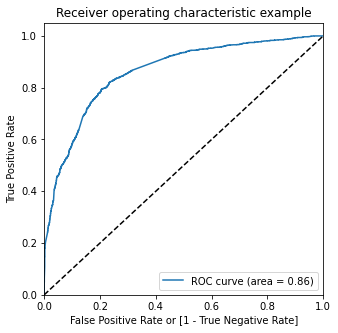

In [90]:
draw_roc(y_train_pred_df.Lead_Score, y_train_pred_df.Lead_Prob)

**We have a very good value of ROC , area under the curve - 0.86**

**The curve is closer towards the left side axis and away from the 45 degree line, which shows that it is a good mode.**

### Optimal Cutoff

In [91]:
#we will create a distribution of probabilies ranging from 0 -> 0.9

prob = [float(x)/10 for x in range(0,10)]

#creating a df for adding respective values for each prob
cutoffs_table = pd.DataFrame({'Lead_Score': y_train.values, 'Lead_Prob':y_train_pred})
for i in prob:
    cutoffs_table[i] = cutoffs_table.Lead_Prob.map(lambda x: 1 if x>i else 0)
cutoffs_table.head()

,Lead_Score,Lead_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8852,0,0.092245,1,0,0,0,0,0,0,0,0,0
7378,0,0.167258,1,1,0,0,0,0,0,0,0,0
8745,1,0.900545,1,1,1,1,1,1,1,1,1,1
6834,1,0.302189,1,1,1,1,0,0,0,0,0,0
1556,0,0.111819,1,1,0,0,0,0,0,0,0,0


In [92]:
#we will now calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['Prob','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in prob:
    cm1 = metrics.confusion_matrix(cutoffs_table.Lead_Score, cutoffs_table[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.485011     1.000000     0.000000
0.1   0.1  0.534899     0.992159     0.104257
0.2   0.2  0.691723     0.945572     0.452650
0.3   0.3  0.772931     0.866236     0.685056
0.4   0.4  0.789038     0.804889     0.774109
0.5   0.5  0.789485     0.744926     0.831451
0.6   0.6  0.758166     0.629613     0.879235
0.7   0.7  0.734228     0.545664     0.911816
0.8   0.8  0.712304     0.454797     0.954822
0.9   0.9  0.642953     0.284594     0.980452


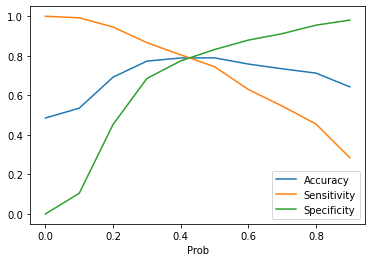

In [93]:
#let us plot the above
cutoff.plot.line(x='Prob',y=['Accuracy','Sensitivity','Specificity'])
plt.show()

**From the above curve, 0.42 looks to be a good cutoff point.**

**We will now make another set of predictions using cutoff value as 0.42**

In [94]:
y_train_pred = logmodel5.predict(X_train_sm5)
y_train_pred.head()

8852    0.092245
7378    0.167258
8745    0.900545
6834    0.302189
1556    0.111819
dtype: float64

In [95]:
#dummy df 
y_train_pred_df = pd.DataFrame({'Lead_Score' : y_train.values, 'Lead_Prob': y_train_pred})
y_train_pred_df.head()

,Lead_Score,Lead_Prob
8852,0,0.092245
7378,0,0.167258
8745,1,0.900545
6834,1,0.302189
1556,0,0.111819


In [112]:
#creating a column for predicted values
y_train_pred_df['Predicted_Lead_Score'] = y_train_pred_df['Lead_Prob'].apply(lambda x : 1 if x>0.42 else 0)
y_train_pred_df.tail()

,Lead_Score,Lead_Prob,Predicted_Lead_Score
8743,1,0.581447,1
100,0,0.776333,1
5861,0,0.099663,0
8636,0,0.211054,0
8197,1,0.805066,1


In [113]:
#checking accuracy score
metrics.accuracy_score(y_train_pred_df.Lead_Score, y_train_pred_df.Predicted_Lead_Score)

0.792841163310962

In [114]:
#creating confusion matrix
conf_matrix = metrics.confusion_matrix(y_train_pred_df.Lead_Score , y_train_pred_df.Predicted_Lead_Score)
conf_matrix

array([[1819,  483],
       [ 443, 1725]], dtype=int64)

In [115]:
#checking other Metrics

TN = conf_matrix[0,0] #true negatives
FP = conf_matrix[0,1] #false positives
FN = conf_matrix[1,0] #false negatives
TP = conf_matrix[1,1] #true positives

In [116]:
#Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7956642066420664

In [117]:
#Let's see the Specificity of our logistic regression model
TN/float(TN+FP)

0.7901824500434405

#### Precision

In [118]:
precision_score(y_train_pred_df.Lead_Score, y_train_pred_df.Predicted_Lead_Score)

0.78125

#### Recall

In [119]:
recall_score(y_train_pred_df.Lead_Score, y_train_pred_df.Predicted_Lead_Score)

0.7956642066420664

In [120]:
p,r,thresholds = precision_recall_curve(y_train_pred_df.Lead_Score,y_train_pred_df.Lead_Prob)

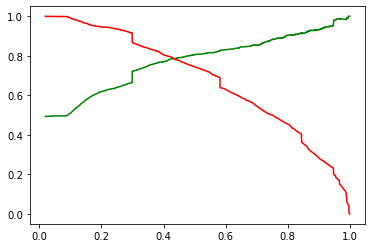

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## VIII. Predictions on Test Data

In [122]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
2079,4.0,344,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7086,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5375,3.0,301,3.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1805,3.0,370,1.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2613,4.0,278,4.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
#checking the columns obtained in the final model
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [124]:
#subsetting test set with required columns 
X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
2079,4.0,344,4.0,0,0,0,0,0,0,0,0
7086,0.0,0,0.0,1,0,0,0,0,0,0,0
5375,3.0,301,3.0,0,0,0,0,0,0,0,0
1805,3.0,370,1.5,0,0,0,0,0,1,0,0
2613,4.0,278,4.0,0,0,0,0,0,0,0,0


In [125]:
#we will now scale the numerical attributes
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                    'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
2079,0.095238,0.151408,0.266667,0,0,0,0,0,0,0,0
7086,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0
5375,0.071429,0.132482,0.200000,0,0,0,0,0,0,0,0
1805,0.071429,0.162852,0.100000,0,0,0,0,0,1,0,0
2613,0.095238,0.122359,0.266667,0,0,0,0,0,0,0,0


In [126]:
#adding constant
X_test_sm = sm.add_constant(X_test)

#### Making Predictions..

In [127]:
y_test_pred = logmodel5.predict(X_test_sm)
y_test_pred.head()

2079    0.164262
7086    0.299085
5375    0.151801
1805    0.427826
2613    0.146850
dtype: float64

In [142]:
#creating dummy df for storing prob and predictions
y_test_pred_df = pd.DataFrame({'Lead_Score': y_test.values, 'Lead_Prob':y_test_pred})
y_test_pred_df['Predicted_Lead_Score'] = y_test_pred_df.Lead_Prob.apply(lambda x : 1 if x>0.42 else 0)
y_test_pred_df.head()

,Lead_Score,Lead_Prob,Predicted_Lead_Score
2079,1,0.164262,0
7086,0,0.299085,0
5375,0,0.151801,0
1805,1,0.427826,1
2613,0,0.146850,0


#### Checking Accuracy

In [143]:
metrics.accuracy_score(y_test_pred_df.Lead_Score, y_test_pred_df.Predicted_Lead_Score)

0.7798643714136672

#### Confusion Matrix

In [144]:
conf_matrix = metrics.confusion_matrix(y_test_pred_df.Lead_Score, y_test_pred_df.Predicted_Lead_Score)
conf_matrix               

array([[811, 210],
       [212, 684]], dtype=int64)

In [145]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [146]:
#Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7633928571428571

In [147]:
#Let's see the Specificity of our logistic regression model
TN/float(TN+FP)

0.7943192948090108

In [149]:
#precision score
precision_score(y_test_pred_df.Lead_Score, y_test_pred_df.Predicted_Lead_Score)

0.7651006711409396

In [150]:
#recall score
recall_score(y_test_pred_df.Lead_Score, y_test_pred_df.Predicted_Lead_Score)

0.7633928571428571

### Lead Score Assignment

In [151]:
#adding a lead score out of 100 for each customer
y_test_pred_df['Final_Lead_Score'] = y_test_pred_df.Lead_Prob.apply(lambda x : round(x*100))
y_test_pred_df.tail()

,Lead_Score,Lead_Prob,Predicted_Lead_Score,Final_Lead_Score
1719,0,0.191248,0,19
4852,1,0.344361,0,34
8758,0,0.126215,0,13
5373,1,0.783302,1,78
2187,0,0.292114,0,29


## IX. Results

**On Training Set**
- **Accuracy    : 79.28%**
- **Sensitivity : 79.56%**
- **Specificity : 79.01%**

**On Train Set**
- **Accuracy    : 78%**
- **Sensitivity : 76.33%**
- **Specificity : 79.43%**

**We are able to produce a model which is able to predict the Lead Conversion with an accuracy of around 80%. The company can go ahead to make use of the model to know how well the customers are likely to convert in favour of them.**

## X. Summary

In [154]:
logmodel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4470
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.8
Date:                Sun, 05 Sep 2021   Deviance:                       4173.7
Time:                        22:28:02   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3474      0.111    -21.143      0.000      -2.565      -2.130
TotalVisits                                              3.4057      0.615      5.535      0.000       2.200       4.612
Total Time Spent on Website                              4.5671      0.186     24.521      0.000       4.202       4.932
Page Views Per Visit                                    -1.1075      0.409     -2.710      0.007      -1.908      -0.307
Lead Source_Olark Chat                                   1.4957      0.134     11.129      0.000       1.232       1.759
Lead Source_Reference                                    4.0345      0.261     15.474      0.000       3.523       4.546
Lead Source_Welingak Website                             5.6902      0.740      7.692      0.000       4.240       7.140
Last Activity_Email Bounced                             -2.4424      0.451     -5.420      0.000      -3.326      -1.559
Last Activity_Had a Phone Conversation                   2.7524      0.812      3.391      0.001       1.162       4.343
Last Activity_SMS Sent                                   1.1804      0.082     14.387      0.000       1.020       1.341
What is your current occupation_Working Professional     2.6895      0.197     13.674      0.000       2.304       3.075
Last Notable Activity_Unreachable                        3.5199      1.068      3.296      0.001       1.427       5.613
========================================================================================================================
"""

- **Leads coming out of Welingak website should be considered with atmost care as they have a very high chance of converting.**
- **Referral programs as usual brings in more customers and company should aim at encouraginf referrals.**
- **Bounced email shows that the person itself has given a false identification and company should not go behind such cases.**

## Thank you!